**Heart Disease Prediction**

**Reading Dataset**

In [5]:
#importing libraries
import os
import numpy as np # numpy is used for fast mathematical computation on arrays and matrices.
import pandas as pd
# visualisation librarry
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
# sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
# keras for ANN model
from keras.layers import Dense
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizers import Adam

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df=pd.read_csv('/content/drive/My Drive/Data/heart.csv')
print(df)

     age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236    0  ...      0      0.0      

**Rows and Column Information**

In [8]:
print(df.shape) # rows and column

(303, 14)


In [9]:
# TO checking all the columns of the data
print(df.columns) 

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [10]:
# To checking data types of the data
print(df.dtypes) 

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [12]:
#To checking any missing value in data
print(df.isnull().sum()) 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


We don't have any missing value in dataset

**Conclude Statical Data**

In [13]:
#The describe() method is used for calculating some statistical data like percentile, mean and std 
#of the numerical values of the Series or DataFrame. 
print(df.describe()) 

              age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]


# GENDER INFORMATION

FEMALE:  96
MALE:  207


Text(0.5, 1.0, 'Distribution of age')

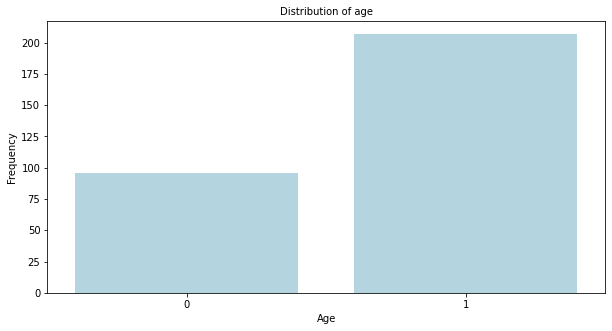

In [14]:
print("FEMALE: ",len(df[df['sex']==0])) #female = 0
print("MALE: ",len(df[df['sex']==1])) # male =1 

# we can also see in visualization

plt.figure(figsize=(10,5))
sns.countplot(df['sex'],color='lightblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of age', fontsize=10)

AS you can see in the plot females & males occurence

**DISTRIBUTION OF AGE**

Text(0.5, 1.0, 'Distribution of age')

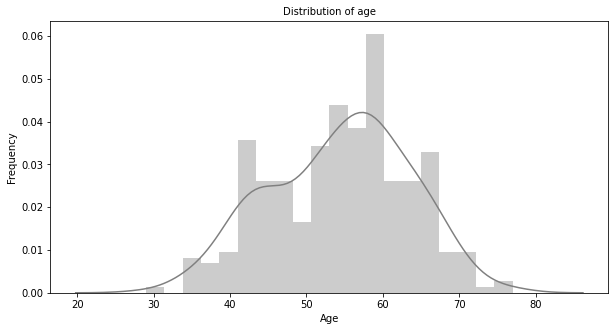

In [15]:

plt.figure(figsize=(10,5))
sns.distplot(df['age'], hist=True, bins=20, color='grey') # using distplot 
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of age', fontsize=10)

As you can se in the age gap between 50-60 we have more pataint

**Visualization of data with one more feature for those who has chest pain (feature)**


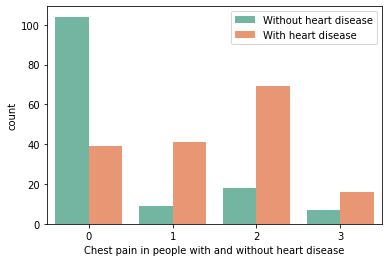

In [16]:
sns.countplot(data=df, x='cp', hue = 'target', palette= 'Set2')
plt.xlabel('Chest pain in people with and without heart disease')
plt.legend( loc='upper right', labels=['Without heart disease', 'With heart disease'])

**SCATTER PLOT of TAREGET data**

FEMALE:  138
MALE:  165


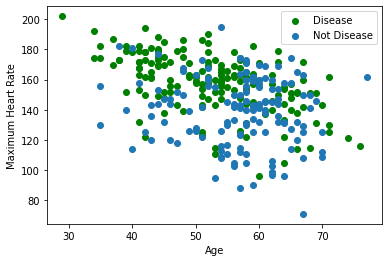

In [17]:
print("FEMALE: ",len(df[df['target']==0])) #female = 0
print("MALE: ",len(df[df['target']==1])) # male =1 
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="green")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

As you can see we have more cases of Males as compare to Females in our dataset

**CORELATION IN DATA**

Put in plain terms, correlation is a measure of how strongly one variable depends on another.

Correlation is very important in the field of Psychology and Education as a measure of relationship between test scores and other measures of performance. With the help of correlation, it is possible to have a correct idea of the working capacity of a person.

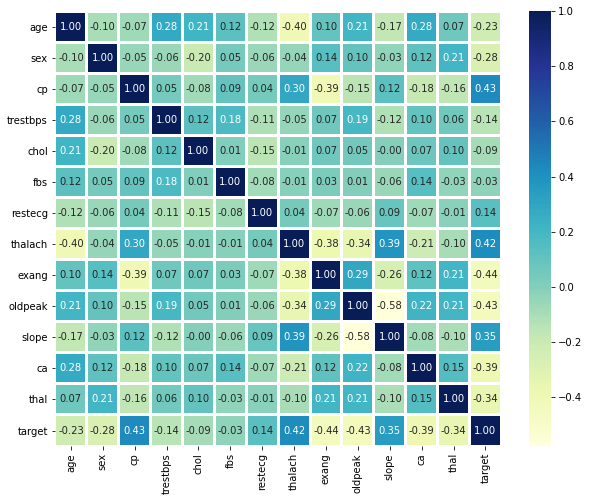

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.2f',linewidths=2)
#No much of correlation

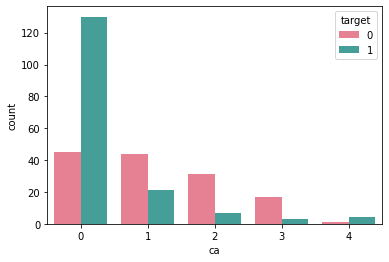

In [19]:
sns.countplot(x='ca',data=df,hue='target',palette='husl',linewidth=5) # using countplot


Conc: People with 'ca' as 0 have highest chance of heart disease

**Plotting the Rest Blood Pressure against age and comparison between sex**

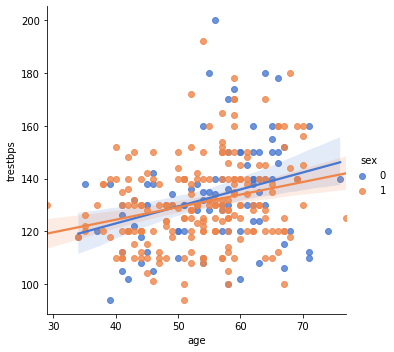

Correlation Coefficient:0.2793509065612883


In [20]:
sns.lmplot(x='age', y='trestbps', data=df, hue='sex', palette='muted')
plt.show()
print('Correlation Coefficient:{}'.format(np.corrcoef(df.age, df.trestbps)[0,1]))

There is a positive correlation between age and rest blood pressure. The Females tend to have slightly higher chance of high blood pressure than males post the age of 50

##TRAIN MODEL

In [21]:
# NOW lets build ML model
#At first we take our matix of features and target variable

# At this moment we have a dataframe that contains all of the heart.csv data. However we need to
# Separate them to [X, Y]. Where our target labels are 'Y', and 'X' is our training data.
X = df.drop(['target'],1)
Y= df['target']

# Now split to train/test with 80% training data, and 20% test data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check dimensions of both sets.
print("Train Features Size:", X_train.shape)
print("Test Features Size:", X_test.shape)
print("Train Labels Size:", Y_train.shape)
print("Test Labels Size:", Y_test.shape)


Train Features Size: (242, 13)
Test Features Size: (61, 13)
Train Labels Size: (242,)
Test Labels Size: (61,)


# **Feature scaling**

The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.

The mean and standard deviation are calculated for the feature and then the feature is scaled based on:

xi–mean(x)stdev(x) If data is not normally distributed, this is not the best scaler to use.

In [0]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(X_train)
x_test = sc_x.transform(X_test)

# **Neural Network Model**

Neural Network Model

Lets create a function that we can call later that builds our Neural Network model, and takes in the learning rate as a parameter. The architecture of the Neural Network that we're going to implement is detailed in the below illustration.





![alt text](https://drive.google.com/uc?id=1UBe6dxQgjDANE87RZMtxtONNdpISTXEC)



In our model, we use Adam (Adaptive Momentum) as our optimization algorithm, and set our metrics to accuracy. Furthermore, I have used the loss function to be sparse_categorical_crossentropy because our traget labels are integers and not one hot encoded.



In [0]:
# Define a Neural Network Model
#A Dense layer feeds all outputs from the previous layer to all its neurons,
#each neuron providing one output to the next layer. 
#It's the most basic layer in neural networks, Let's suppose a Dense(10) has ten neurons.
def NN_model(learning_rate):
    model = Sequential() #neural network using the Sequential model API
    model.add(Dense(32, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='softmax'))
    Adam(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

Now lets build the NN-model and start training. I chose learning_rate=0.01, epochs=100, and batch_size=16.

Training the model for 100 epochs, seems to be pretty fine in order to avoid overfitting. I already performed training with 1000 epochs and around 100 epochs was the reasonable number of epochs for early stopping.

Lets take a look at our model summary.

In [25]:
# Build a NN-model, and start training
learning_rate = 0.01
model = NN_model(learning_rate)
print(model.summary())  # Summary of neural network

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 34        
Total params: 1,010
Trainable params: 1,010
Non-trainable params: 0
_________________________________________________________________
None


**Now we train our model**

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=16, verbose=2)

In [26]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=110, batch_size=16, verbose=2)

Epoch 1/110
16/16 - 0s - loss: 0.7101 - accuracy: 0.5165 - val_loss: 0.6595 - val_accuracy: 0.6557
Epoch 2/110
16/16 - 0s - loss: 0.6572 - accuracy: 0.5909 - val_loss: 0.6734 - val_accuracy: 0.5574
Epoch 3/110
16/16 - 0s - loss: 0.6394 - accuracy: 0.6198 - val_loss: 0.6247 - val_accuracy: 0.5902
Epoch 4/110
16/16 - 0s - loss: 0.6465 - accuracy: 0.6198 - val_loss: 0.5959 - val_accuracy: 0.7213
Epoch 5/110
16/16 - 0s - loss: 0.6159 - accuracy: 0.6116 - val_loss: 0.5645 - val_accuracy: 0.7377
Epoch 6/110
16/16 - 0s - loss: 0.6132 - accuracy: 0.6777 - val_loss: 0.5413 - val_accuracy: 0.7705
Epoch 7/110
16/16 - 0s - loss: 0.5932 - accuracy: 0.6653 - val_loss: 0.5320 - val_accuracy: 0.7377
Epoch 8/110
16/16 - 0s - loss: 0.5522 - accuracy: 0.7107 - val_loss: 0.5240 - val_accuracy: 0.7705
Epoch 9/110
16/16 - 0s - loss: 0.5902 - accuracy: 0.7149 - val_loss: 0.5944 - val_accuracy: 0.6721
Epoch 10/110
16/16 - 0s - loss: 0.5866 - accuracy: 0.6570 - val_loss: 0.5102 - val_accuracy: 0.7705
Epoch 11/

In [27]:
#Now, we predict our model 
comp_accuracies=[] # initializing one list which stores the accuracies of all the model in this project
predictions = np.argmax(model.predict(X_test),axis=1) 
#argmax is a function which gives the index of the greatest number in the given row or column and the row or column 
#can be decided using axis attribute of argmax funcion.
model_accuracy = accuracy_score(Y_test, predictions)*100 # calculating accuracy score
comp_accuracies.append(model_accuracy)
print("Model Accracy:", model_accuracy,"%")
#confusion matrix
# precision(positive predictive value)
# Precision= TP/(TP+FP)
#recall kown as sensitivity or true positive rate 
#recall = TP/(TP+FN)
# f1-score, it is combination of precision and recall
# f1-score= 2 * ((precision *recall)/(precision+recall))
print(classification_report(Y_test, predictions)) # Classification Report

Model Accracy: 88.52459016393442 %
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



We get, an **ANN model accuracy** of around 89% and very 



similar  f1  score, we have a very good performing model that generalizes well to the test set.

# **Logistic Regression**

Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.

In [28]:
import sklearn
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=5)
from sklearn.linear_model import LogisticRegression # importing logistic rgression model from 
logreg=LogisticRegression() # all parameters not specified are set to their defaults
logreg.fit(x_train,y_train) #Model is learning the relationship between digits x_train and labels y_train
y_pred=logreg.predict(x_test) #Predict labels for new data 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
print("Logistic regression Accuracy score is:",accuracy_score(y_test,y_pred))
comp_accuracies.append(accuracy_score(y_test,y_pred))

Logistic regression Accuracy score is: 0.9180327868852459


**Accuracy of Logistic Regression Model is approx 92%**

**Confusion Matrix**

A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known.

The number of incorrect predictions for each class, organized by the class that was predicted.
It also allows the visualization of the performance of an algorithm.

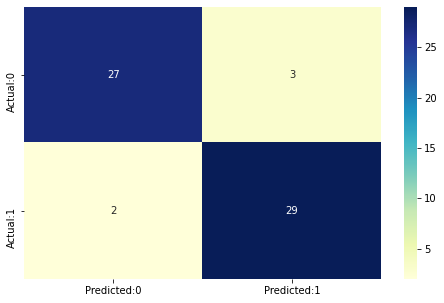

In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
#A heatmap is a two-dimensional graphical representation of data where the individual values 
#that are contained in a matrix are represented as colors. The seaborn python package allows 
#the creation of annotated heatmaps.

The confusion matrix shows 27+29 = 56 correct predictions and 2+3= 5 incorrect ones.

True Positives: 29

True Negatives: 27

False Positives: 3 (Type I error)

False Negatives: 2 ( Type II error)

**Clasification  Report**

A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report

In [31]:
#confusion matrix

# precision(positive predictive value)
# Precision= TP/(TP+FP)
#recall kown as sensitivity or true positive rate 
#recall = TP/(TP+FN)
# f1-score, it is combination of precision and recall
# f1-score= 2 * ((precision *recall)/(precision+recall))
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[27  3]
 [ 2 29]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        30
           1       0.91      0.94      0.92        31

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

0.9180327868852459


The accuracy of Logistic regtression is 92%, till now in we have trained two models ANN and Logistic Regression, we got ANN best but we can imporove more by using Regularisation to introduce the penality: lesso (l1) and ridge(l2) to increase the accuracy of Logistic regression.

# **Now, we will apply 5 algorithms and predict their outputs...**

**Decision Tree Classification** - Decision Trees are a type of Supervised Machine Learning (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves.
Decision tree builds classification or regression models in the form of a tree structure. It breaks down a data set into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. ... A decision node has two or more branches. Leaf node represents a classification or decision

**Support Vector Classification** -  Support Vector Machine (SVM) could be a supervised binary classification algorithm. Given a collection of points of two types in the dataset, it makes dimensional hyperplane to separate those points into two groups this hyperplane could be a line dividing a plane into two parts wherein each class lay on either side. The points which positions are within the separating Hyperplane is termed Support Vectors. I've got implemented the minimal sequential optimization which breaks the issues in subproblems then solve it actually.

**K-Neighbors Classification**- K-nearest neighbor is employed for both regression and classification problems and there's no training process for this algorithm, the whole data set is employed for predicting/classifying new data. When brand new information is given, to label a brand new point it's at the new point nearest to that and votes for it and whichever label is that the most voted that label is given to the new point.
In implementation part Scikit learn library is available in which we can perfoem this and predict the output.

**Random Forest Classification** - Random forest could be a tree-based classification algorithm. because the name indicates, the algorithm creates a forest with an outsized number of trees. it's an ensemble algorithm which mixes multiple algorithms. It creates a collection of decision trees from a random sample of the training set. It repeats the method with multiple random samples and makes a judgment supported majority voting. The Random forest algorithm is effective in handling missing values but it's at risk of overfitting. Appropriate parameter tuning will be applied to avoid overfitting.

**Gausian Nave Bayes** - In Gaussian Naive Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution. A Gaussian distribution is also called Normal distribution.
It is an algorithm having a Probabilistic Approach. It involves prior and posterior probability calculation of the classes in the dataset and the test data given a class respectively. Prior probabilities of all the classes are calculated using the same formula.

In [32]:
#importimg all the algorithens library from sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


classifiers=[['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['Gaussian Naive Bayes :',GaussianNB()]]
cla_pred=[] #adding accuracies in the list
acc=[] # list for, adding accuracies for the final result of visulisation
for name,model in classifiers:
    model=model
    model.fit(X_train,Y_train) # we are fitting the data into the model with training dataset
    predictions = model.predict(X_test) # now we are predicting with test datset
    cla_pred.append(accuracy_score(Y_test,predictions)) # finding accuracy
    print(name,accuracy_score(Y_test,predictions))
    acc.append(accuracy_score(Y_test,predictions))

Decision Tree Classification : 0.8032786885245902
Random Forest Classification : 0.8360655737704918
K-Neighbors Classification : 0.6885245901639344
Support Vector Classification : 0.7049180327868853
Gaussian Naive Bayes : 0.8688524590163934


**Compare all the algorithems with their accuracies in bar plot**

In [0]:
accc={} # declaring one dictionary whic contains keys and values
#Now, I am adding all the results in the accc dictionry
accc['A-N Network']=comp_accuracies[0]
accc['Logistic Regression']=comp_accuracies[1]*100
accc['Deceason Tree']=acc[0]*100
accc['Random Forest']=acc[1]*100
accc['K-Neighbours']=acc[2]*100
accc['Support Vector']=acc[3]*100
accc['Gausian Nave Bayes']=acc[4]*100

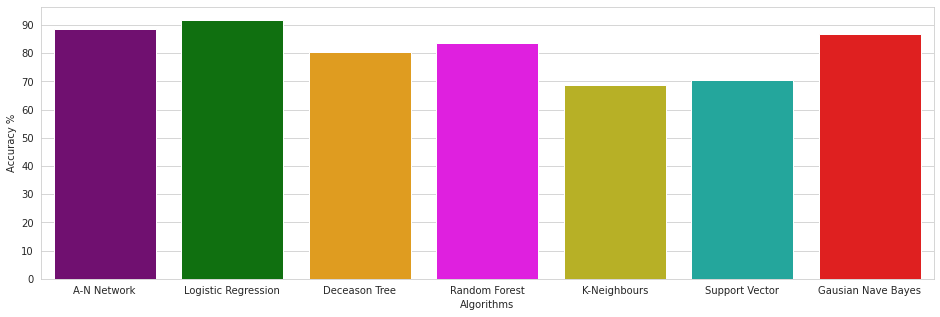

In [34]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE","red"]
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accc.keys()), y=list(accc.values()), palette=colors) #using bar plot
plt.show()

So, you can we achieve 92% accuracy in Logistic Regression which is best amoung all other.

**Conclusion**

This dataset is very small but helped me to create a simple model and machine learning techniques. 

ML technologies have become increasingly important and has a greater role in medical devices and Pharma Industry.

## **ThankYou!!!!!**